In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tgf = pd.read_excel('testando_fftTGF.xlsx')
sp = pd.read_excel('testando_fftSP.xlsx')

tgf = np.array(tgf['fft TGF'])
sp = np.array(sp['fft SP'])

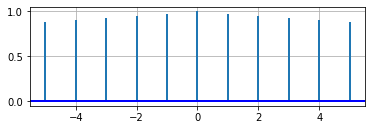

In [12]:
fig = plt.figure() 
ax1 = fig.add_subplot(211) 
ax1.xcorr(tgf, sp, usevlines=True, 
          maxlags=5, normed=True, 
          lw=2) 
ax1.grid(True) 
ax1.axhline(0, color='blue', lw=2) 
plt.show() 